# HDF5 Basics

Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data. Originally developed at the National Center for Supercomputing Applications, it is supported by The HDF Group, a non-profit corporation whose mission is to ensure continued development of HDF5 technologies and the continued accessibility of data stored in HDF.[1](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) 

They are widely used format for open source projects, the python ecosystem e.g. pandas, are the backend for other file formats e.g. [netcdf-4](https://www.unidata.ucar.edu/software/netcdf/docs/faq.html#What-Is-netCDF), and are use extensively in electron microscopy libraries such as:
- [Prismatic S/TEM/Simulation program](https://github.com/prism-em/prismatic),
- [hyperspy (.hspy)](https://github.com/hyperspy/hyperspy), 
- [Electron Microscopy Dataformat(.emd)](https://emdatasets.com/) and ... 
- **[py4DSTEM](https://github.com/py4dstem/py4DSTEM)**  

HDF5 files are based the concept of groups (python dictionary like) and datasets (numpy like)

Two basic packages for dealing with hdf5 files in python:

1. [h5py](https://docs.h5py.org/en/stable/) (import h5py)
2. [pytables](https://www.pytables.org/) (import tables)

We'll use h5py here

## Toy Problem

In [1]:
import h5py # handle the hdf5 (h5) files
import numpy as np # create the data
import os # create a tempoary directory
import shutil
from pathlib import Path # handle paths
import matplotlib.pyplot as plt

In [2]:
# lets create an tempory file file directory to store all our files

In [3]:
os.mkdir('temp_hdf5s')
path = Path('temp_hdf5s/')

lets create some fake data

In [4]:
data_2D = np.kron([[1, 0] * 16, [0, 1] * 16] * 16, np.ones((8, 8))) # make a 
data_4D = np.tile(data_2D, (10,10,1,1)) # repeat the 2D data in 4D 
metadata_text = "some string of text" 
metadata_values_x = np.arange(10)
metadata_values_y = np.arange(10)

lets create a the h5 file

In [5]:
file = h5py.File(path/'my_first_hdf.h5', 'w') 

lets look at what that returns

In [6]:
file

<HDF5 file "my_first_hdf.h5" (mode r+)>

hdf5 files behave like python dictionaries, and will return keys

In [7]:
file.keys()

<KeysViewHDF5 []>

currently its empty lets create a group

In [8]:
file.create_group('/Custom-hdf5')

<HDF5 group "/Custom-hdf5" (0 members)>

now if we run keys it will return teh group we just created 

In [9]:
file.keys()

<KeysViewHDF5 ['Custom-hdf5']>

we can see what keys this group has just like we did earlier

In [10]:
file['Custom-hdf5'].keys()

<KeysViewHDF5 []>

lets create a dataset for our 4D-dataset

In [11]:
file['Custom-hdf5'].create_group('4D-dataset')

<HDF5 group "/Custom-hdf5/4D-dataset" (0 members)>

we can check that it is empty

In [12]:
file['Custom-hdf5/4D-dataset'].keys()

<KeysViewHDF5 []>

inside this group we will add some datsets 

In [13]:
file['Custom-hdf5/4D-dataset'].create_dataset('data', data=data_4D)
file['Custom-hdf5/4D-dataset'].create_dataset('metadata_x', data=metadata_values_x)
file['Custom-hdf5/4D-dataset'].create_dataset('metadata_y', data=metadata_values_y)
file['Custom-hdf5/4D-dataset'].create_dataset('string_field', data=metadata_text)

<HDF5 dataset "string_field": shape (), type "|O">

now if we look at the keys

In [14]:
file['Custom-hdf5/4D-dataset'].keys()

<KeysViewHDF5 ['data', 'metadata_x', 'metadata_y', 'string_field']>

lets create another group for our 2D-dataset  

In [15]:
file['Custom-hdf5'].create_group('2D-dataset')

<HDF5 group "/Custom-hdf5/2D-dataset" (0 members)>

In [16]:
file['Custom-hdf5/2D-dataset'].create_dataset('data', data=data_2D)
file['Custom-hdf5/2D-dataset'].create_dataset('metadata_x', data=np.arange(256, dtype=np.int32))
file['Custom-hdf5/2D-dataset'].create_dataset('metadata_y', data=np.arange(256, dtype=np.int32))

<HDF5 dataset "metadata_y": shape (256,), type "<i4">

we can start to see the tree like structure to the folder. Also notice the different way we can access the groups

In [17]:
print(file.keys())
print(file['Custom-hdf5'].keys())
print(file['Custom-hdf5']['4D-dataset'].keys())
print(file['Custom-hdf5']['2D-dataset'].keys())

<KeysViewHDF5 ['Custom-hdf5']>
<KeysViewHDF5 ['2D-dataset', '4D-dataset']>
<KeysViewHDF5 ['data', 'metadata_x', 'metadata_y', 'string_field']>
<KeysViewHDF5 ['data', 'metadata_x', 'metadata_y']>


In [18]:
print(type(file['Custom-hdf5']))
print(type(file['Custom-hdf5/4D-dataset/'])),
print(type(file['Custom-hdf5/4D-dataset/data']))
print(type(file['Custom-hdf5/4D-dataset/string_field']))

<class 'h5py._hl.group.Group'>
<class 'h5py._hl.group.Group'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>


There are better ways to walk through a hdf5 file, here's one example

In [19]:
def hdf5_printer(name, obj):
    print(name, obj)
    return None 

file.visititems(hdf5_printer)


Custom-hdf5 <HDF5 group "/Custom-hdf5" (2 members)>
Custom-hdf5/2D-dataset <HDF5 group "/Custom-hdf5/2D-dataset" (3 members)>
Custom-hdf5/2D-dataset/data <HDF5 dataset "data": shape (256, 256), type "<f8">
Custom-hdf5/2D-dataset/metadata_x <HDF5 dataset "metadata_x": shape (256,), type "<i4">
Custom-hdf5/2D-dataset/metadata_y <HDF5 dataset "metadata_y": shape (256,), type "<i4">
Custom-hdf5/4D-dataset <HDF5 group "/Custom-hdf5/4D-dataset" (4 members)>
Custom-hdf5/4D-dataset/data <HDF5 dataset "data": shape (10, 10, 256, 256), type "<f8">
Custom-hdf5/4D-dataset/metadata_x <HDF5 dataset "metadata_x": shape (10,), type "<i4">
Custom-hdf5/4D-dataset/metadata_y <HDF5 dataset "metadata_y": shape (10,), type "<i4">
Custom-hdf5/4D-dataset/string_field <HDF5 dataset "string_field": shape (), type "|O">


### lets look at the data

In [20]:
file['Custom-hdf5/4D-dataset/data']

<HDF5 dataset "data": shape (10, 10, 256, 256), type "<f8">

The above didn't return the data like we might expect, instead it returns a pointer to the data with some of metadata. The shape is as we expect, the type '<f8' might look strange but it stands for float 64 with little [endian](https://en.wikipedia.org/wiki/Endianness) order, which is the type of data from our orignal dataset. To read [here](https://numpy.org/doc/stable/reference/arrays.dtypes.html) for more information  

To access our data we instead need to do one of two (maybe more ways) things

In [21]:
# get all of the dataset
print(file['Custom-hdf5/4D-dataset/data'][...].shape) # ... c.f. numpy and returns all  all indexes, equiv to [:,:,:,:]
print(np.array(file['Custom-hdf5/4D-dataset/data']).shape) # numpy handles this for us
#slice the dataset 
print(file['Custom-hdf5/4D-dataset/data'][0,0,...].shape) # equiv to [0,0,:,:]
print(np.array(file['Custom-hdf5/4D-dataset/data'])[0,0,:,:].shape)

# these methods yield the same result, numpy arrays which are equal
print(type(file['Custom-hdf5/4D-dataset/data'][0,0,...]), 
      type(np.array(file['Custom-hdf5/4D-dataset/data'])[0,0,:,:]))
print(np.all(np.array(file['Custom-hdf5/4D-dataset/data'])[0,0,:,:] == file['Custom-hdf5/4D-dataset/data'][0,0,...]))

(10, 10, 256, 256)
(10, 10, 256, 256)
(256, 256)
(256, 256)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
True


quick demonstration that that data is what we'd expect

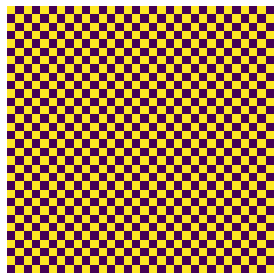

In [23]:
plt.imshow(file['Custom-hdf5/4D-dataset/data'][0,0,...])
plt.axis('off')
plt.tight_layout()
plt.show()

It's important to remember to close the file

In [24]:
file.close()

A prefered way to handle opening and closing the files as flowing 

In [25]:
with h5py.File(path/'my_first_hdf.h5', 'r') as f: # here we are opening the file in 'r' == read only mode
    data_4d = f['Custom-hdf5/4D-dataset/data'][...] # get all the data 

We can check the file, f is closed, but we got our data

In [26]:
f, data_4d.shape

(<Closed HDF5 file>, (10, 10, 256, 256))

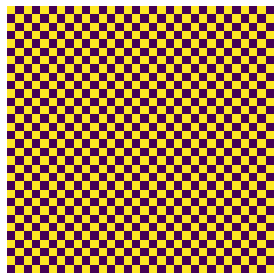

In [27]:
plt.imshow(data_4d[0,0,...])
plt.axis('off')
plt.tight_layout()
plt.show()

## Real World 

Thankfully most packages handle this for us proivided the hdf5 are formatted in a way they expect. However, sometimes we need to extract the data from a non-native file type.  

In [28]:
import py4DSTEM
from py4DSTEM.io import download_file_from_google_drive

this downloads ~ 900mb h5 file 

In [29]:
download_file_from_google_drive("1bHv3u61Cr-y_GkdWHrJGh1lw2VKmt3UM", path/"carbon_nanotube_data.h5")

Downloading


First we examine the structure of the file type and identify the path to the data

In [30]:
with  h5py.File(path/"carbon_nanotube_data.h5",'r') as f: 

    f.visititems(hdf5_printer)


4D-STEM_data <HDF5 group "/4D-STEM_data" (1 members)>
4D-STEM_data/metadata <HDF5 group "/4D-STEM_data/metadata" (7 members)>
4D-STEM_data/metadata/calibration <HDF5 group "/4D-STEM_data/metadata/calibration" (0 members)>
4D-STEM_data/metadata/comments <HDF5 group "/4D-STEM_data/metadata/comments" (0 members)>
4D-STEM_data/metadata/microscope <HDF5 group "/4D-STEM_data/metadata/microscope" (0 members)>
4D-STEM_data/metadata/original <HDF5 group "/4D-STEM_data/metadata/original" (2 members)>
4D-STEM_data/metadata/original/all <HDF5 group "/4D-STEM_data/metadata/original/all" (0 members)>
4D-STEM_data/metadata/original/shortlist <HDF5 group "/4D-STEM_data/metadata/original/shortlist" (0 members)>
4D-STEM_data/metadata/processing <HDF5 group "/4D-STEM_data/metadata/processing" (0 members)>
4D-STEM_data/metadata/sample <HDF5 group "/4D-STEM_data/metadata/sample" (0 members)>
4D-STEM_data/metadata/user <HDF5 group "/4D-STEM_data/metadata/user" (0 members)>
4DSTEM_experiment <HDF5 group "/4D

Then we can extract the data we need and load with py4DSTEM 

In [31]:
with  h5py.File(path/"carbon_nanotube_data.h5",'r') as f:
    data = f['4DSTEM_experiment']['data']['datacubes']['datacube_0']['datacube'][...]

In [32]:
# The next step is to import this experiment as a py4DSTEM datacube.
# note that we are accessing a "dataset" inside various groups (groups are the HDF5 equivalent of directories)
dataset = py4DSTEM.io.DataCube(data=data)

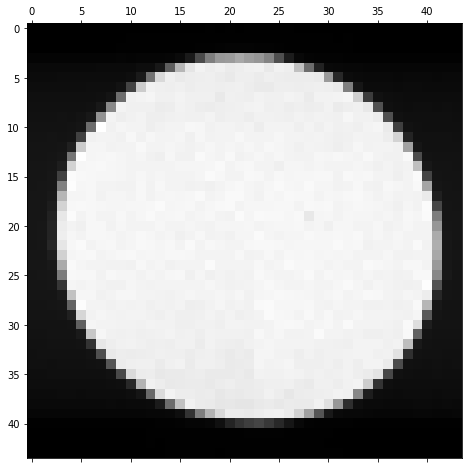

In [33]:
# Let's examine the mean diffraction space image, by taking the average over all probe positions:
diffraction_pattern_mean = np.mean(dataset.data, axis=(0,1))
py4DSTEM.visualize.show(diffraction_pattern_mean)

We can explore the fields like we did with our fake dataset 

We'll remove the folder 

In [34]:
shutil.rmtree(path)